# Слияние результатов прогнозов по Лиховидову и по Лиховидову плюс объемы.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
# === ЗАГРУЗКА ФАЙЛОВ ===
df_lih = pd.read_csv("predictions_fut_lih_with_win_02.csv")
df_lih.drop(['CANDLE_CODE', 'PREDICTION', 'STREAK'], axis=1, inplace=True)

df_lih_vol = pd.read_csv("predictions_fut_lih_vol_with_win_02.csv")
df_lih_vol.drop(['CANDLE_CODE', 'PREDICTION', 'STREAK'], axis=1, inplace=True)

# Слияние DataFrame по пололям
df = pd.merge(df_lih, df_lih_vol, on=['TRADEDATE', 'OPEN', 'LOW', 'HIGH', 'CLOSE', 'VOLUME'])

df

,TRADEDATE,OPEN,LOW,HIGH,CLOSE,VOLUME,CANDLE_INT_x,PREDICTION_SHIFTED_x,WIN_x,CANDLE_INT_y,PREDICTION_SHIFTED_y,WIN_y
0,2023-02-17,92180.0,91400.0,93950.0,93900.0,110862,10,NaN,0,32,NaN,0
1,2023-02-20,93910.0,92090.0,94430.0,93100.0,112233,8,1.0,0,26,0.0,1
2,2023-02-21,93200.0,92650.0,95940.0,94850.0,143567,16,0.0,0,50,1.0,1
3,2023-02-22,94650.0,93150.0,95200.0,93910.0,86329,8,0.0,1,24,0.0,1
4,2023-02-24,93990.0,92000.0,94890.0,92310.0,96469,7,0.0,1,21,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
504,2025-02-12,98600.0,98120.0,101480.0,100700.0,124069,13,1.0,1,41,1.0,1
505,2025-02-13,100570.0,100080.0,111010.0,109930.0,247083,12,1.0,1,38,0.0,0
506,2025-02-14,109750.0,106470.0,114130.0,108620.0,282242,8,1.0,0,26,0.0,1
507,2025-02-17,108960.0,108050.0,115370.0,115170.0,183356,10,1.0,1,32,0.0,0


In [84]:
# === РАСЧЁТ РЕЗУЛЬТАТОВ ПРОГНОЗА ===
def calculate_result(row):
    if pd.isna(row["PREDICTION_SHIFTED_x"]):  # Если NaN после сдвига
        return 0  # Можно удалить или оставить 0
    if pd.isna(row["PREDICTION_SHIFTED_y"]):  # Если NaN после сдвига
        return 0  # Можно удалить или оставить 0

    true_direction = 1 if row["CLOSE"] > row["OPEN"] else 0
    predicted_direction_x = row["PREDICTION_SHIFTED_x"]
    predicted_direction_y = row["PREDICTION_SHIFTED_y"]

    difference = abs(row["CLOSE"] - row["OPEN"])
    if (true_direction == predicted_direction_x) and (true_direction == predicted_direction_y):
        return difference
    elif(true_direction != predicted_direction_x) and (predicted_direction_x == predicted_direction_y):
        return -difference
    else:
        return 0
    
    # return difference if true_direction == predicted_direction else -difference

df["RESULT"] = df.apply(calculate_result, axis=1)
df["CUMULATIVE_RESULT"] = df["RESULT"].cumsum()

df

,TRADEDATE,OPEN,LOW,HIGH,CLOSE,VOLUME,CANDLE_INT_x,PREDICTION_SHIFTED_x,WIN_x,CANDLE_INT_y,PREDICTION_SHIFTED_y,WIN_y,RESULT,CUMULATIVE_RESULT
0,2023-02-17,92180.0,91400.0,93950.0,93900.0,110862,10,NaN,0,32,NaN,0,0.0,0.0
1,2023-02-20,93910.0,92090.0,94430.0,93100.0,112233,8,1.0,0,26,0.0,1,0.0,0.0
2,2023-02-21,93200.0,92650.0,95940.0,94850.0,143567,16,0.0,0,50,1.0,1,0.0,0.0
3,2023-02-22,94650.0,93150.0,95200.0,93910.0,86329,8,0.0,1,24,0.0,1,740.0,740.0
4,2023-02-24,93990.0,92000.0,94890.0,92310.0,96469,7,0.0,1,21,1.0,0,0.0,740.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2025-02-12,98600.0,98120.0,101480.0,100700.0,124069,13,1.0,1,41,1.0,1,2100.0,100010.0
505,2025-02-13,100570.0,100080.0,111010.0,109930.0,247083,12,1.0,1,38,0.0,0,0.0,100010.0
506,2025-02-14,109750.0,106470.0,114130.0,108620.0,282242,8,1.0,0,26,0.0,1,0.0,100010.0
507,2025-02-17,108960.0,108050.0,115370.0,115170.0,183356,10,1.0,1,32,0.0,0,0.0,100010.0


In [85]:
# Подсчет количества положительных и отрицательных значений
num_positive = df[df['RESULT'] > 0].shape[0]
num_negative = df[df['RESULT'] < 0].shape[0]

# Суммы положительных и отрицательных значений
sum_positive = df[df['RESULT'] > 0]['RESULT'].sum()
sum_negative = df[df['RESULT'] < 0]['RESULT'].sum()

print(f"Количество положительных значений: {num_positive}")
print(f"Количество отрицательных значений: {num_negative}")
print(f"Сумма положительных значений: {sum_positive}")
print(f"Сумма отрицательных значений: {sum_negative}")

Количество положительных значений: 176
Количество отрицательных значений: 101
Сумма положительных значений: 194190.0
Сумма отрицательных значений: -91330.0


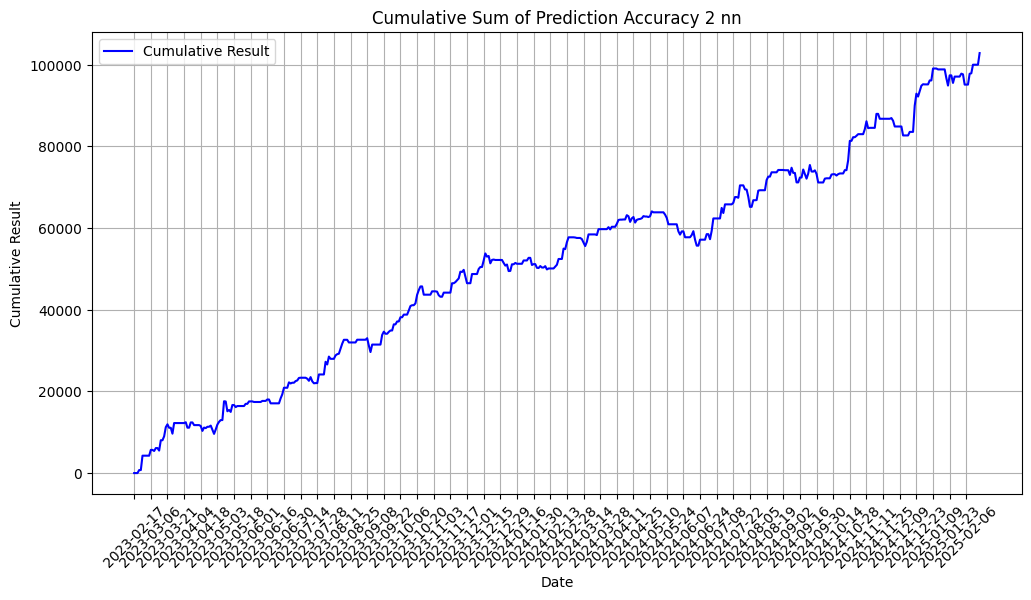

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df["TRADEDATE"], df["CUMULATIVE_RESULT"], label="Cumulative Result", color="b")
plt.xlabel("Date")
plt.ylabel("Cumulative Result")
plt.title("Cumulative Sum of Prediction Accuracy 2 nn")
plt.legend()
plt.grid()

# plt.xticks(rotation=45)
plt.xticks(df["TRADEDATE"][::10], rotation=45)
plt.show()

In [87]:
"""
По данным на 25 февраля 2025 года, стоимость пункта цены фьючерса RTS-3.25 
на индекс РТС (RTSI) — 1,73 рубля.
По данным на 25 февраля 2025 года, для покупки фьючерса RTS-3.25 на индекс 
РТС (RIH5) необходимо иметь на счету гарантийное обеспечение в 38 164,08
"""
df["CUM_RUB"] = df["CUMULATIVE_RESULT"] * 1.73

df

,TRADEDATE,OPEN,LOW,HIGH,CLOSE,VOLUME,CANDLE_INT_x,PREDICTION_SHIFTED_x,WIN_x,CANDLE_INT_y,PREDICTION_SHIFTED_y,WIN_y,RESULT,CUMULATIVE_RESULT,CUM_RUB
0,2023-02-17,92180.0,91400.0,93950.0,93900.0,110862,10,NaN,0,32,NaN,0,0.0,0.0,0.0
1,2023-02-20,93910.0,92090.0,94430.0,93100.0,112233,8,1.0,0,26,0.0,1,0.0,0.0,0.0
2,2023-02-21,93200.0,92650.0,95940.0,94850.0,143567,16,0.0,0,50,1.0,1,0.0,0.0,0.0
3,2023-02-22,94650.0,93150.0,95200.0,93910.0,86329,8,0.0,1,24,0.0,1,740.0,740.0,1280.2
4,2023-02-24,93990.0,92000.0,94890.0,92310.0,96469,7,0.0,1,21,1.0,0,0.0,740.0,1280.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2025-02-12,98600.0,98120.0,101480.0,100700.0,124069,13,1.0,1,41,1.0,1,2100.0,100010.0,173017.3
505,2025-02-13,100570.0,100080.0,111010.0,109930.0,247083,12,1.0,1,38,0.0,0,0.0,100010.0,173017.3
506,2025-02-14,109750.0,106470.0,114130.0,108620.0,282242,8,1.0,0,26,0.0,1,0.0,100010.0,173017.3
507,2025-02-17,108960.0,108050.0,115370.0,115170.0,183356,10,1.0,1,32,0.0,0,0.0,100010.0,173017.3


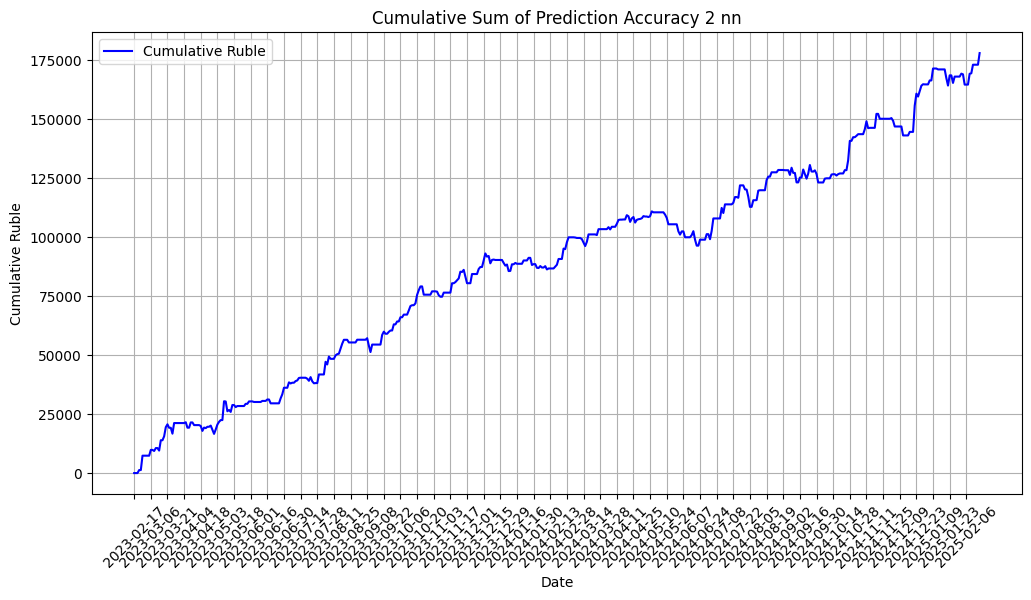

In [ ]:
plt.figure(figsize=(12, 6))
# plt.plot(df["TRADEDATE"], df["CUMULATIVE_RESULT"], label="Cumulative Result", color="b")
plt.plot(df["TRADEDATE"], df["CUM_RUB"], label="Cumulative Ruble", color="b")
plt.xlabel("Date")
plt.ylabel("Cumulative Ruble")
plt.title("Cumulative Sum of Prediction Accuracy 2 nn")
plt.legend()
plt.grid()

# plt.xticks(rotation=45)
plt.xticks(df["TRADEDATE"][::10], rotation=45)
plt.show()